This is the second iteration of the data wrangling process.

Below is the summary:


In short, the project is to create a model that can inform me which nutrients and vitamins I need to monitor and ensure I am getting enough in order to ensure that I am able to gain 10 lbs by September 20th of 2024.



Here is a link to the project proposal: https://docs.google.com/document/d/1cmwdacCTAq5hPO_PyioR-l9hnVlCGy5J5BGr9YYgY7M/edit



In this data wrangling, I will establish which genes are most significant in the group of the study that had the highest muscle growth.  Then I will link the genes to their perspective enzyme, an enzyme being the functional unit in the muscles that will catalyze change and development in the muscle.  Using the Enzyme Classification system (EC) I will set a classification to each gene that is applicable.  Then I will create a set of associative (summary web scrapes from journal publishing and wikipedia summaries) dictionaries of nutrient and vitamins to their perspective participation in each enzyme classes.  From there, the assocation factors will be multiplied by the membership and traitsig factors of the experiment data set, creating weighted associations of each vitamin and nutrient in question.

The explanatory variable in the model will be the gene membership and trait weights as listed by the experiment; these variables are essentially gene clusters that were mapped to their significance in the experimental success, and then the genes were mapped to their significance into these clusters.  

The response variables will be the nutrient and vitamin weighted associations.  The model will return which vitamins and minerals are most heavily associated with the genes most heavily implicated in the success of the muscle gain.  

The data that will be used is coming from three sources: 

1.) Below is an article containing data on which gene expressions are most significant in highest muscle growth in a population that was resistance training
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8424535/
2.) Below is the ncbi datasets containing a plethora of genetic information and specifically descriptions on the enzyzmes created by genes:
https://www.ncbi.nlm.nih.gov/datasets
3.) Below is a spreadsheet containing all of the sources that were used to scrape information on the different nutrient and vitamins inspected in this:
https://docs.google.com/spreadsheets/d/e/2PACX-1vSPbumnC2FG7QbilXNMXzGAeuT9htHy2MNP_qFUBRLxBGheJai-S9E0ecnMUHnjmHlYo7RxXWVPctMI/pubhtml



In the process of data wrangling many edits had to take place, as there were missing values and non essential values as well.






1.) Step One is the uploading of the first data: the data from the muscle growth experiment

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df= pd.read_excel('Table_S2.xlsx')

df.head()

,"Table S2: Genes in WGCNA Prediction analysis red module (n = 307), strength of association with change in mid-thigh muscle area as measured by CT, and top LV/pathway association in PLIER",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,module,membership,traitsig,ensg_version,gene,LV_number,LV_pathway
2,red,0.5158,0.2172,ENSG00000137959.15,IFI44L,2,MetaMEx_AerobicTraining
3,red,0.5497,0.4713,ENSG00000160710.16,ADAR,2,MetaMEx_AerobicTraining
4,red,0.7754,0.5447,ENSG00000082512.14,TRAF5,2,MetaMEx_AerobicTraining


Editing the dataframe so it is digestable and inspecting

In [2]:
df.columns = df.iloc[1]

df.head()

1,module,membership,traitsig,ensg_version,gene,LV_number,LV_pathway
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,module,membership,traitsig,ensg_version,gene,LV_number,LV_pathway
2,red,0.5158,0.2172,ENSG00000137959.15,IFI44L,2,MetaMEx_AerobicTraining
3,red,0.5497,0.4713,ENSG00000160710.16,ADAR,2,MetaMEx_AerobicTraining
4,red,0.7754,0.5447,ENSG00000082512.14,TRAF5,2,MetaMEx_AerobicTraining


In [3]:
df = df.drop([0,1])
df.reset_index()
df.head()

1,module,membership,traitsig,ensg_version,gene,LV_number,LV_pathway
2,red,0.5158,0.2172,ENSG00000137959.15,IFI44L,2,MetaMEx_AerobicTraining
3,red,0.5497,0.4713,ENSG00000160710.16,ADAR,2,MetaMEx_AerobicTraining
4,red,0.7754,0.5447,ENSG00000082512.14,TRAF5,2,MetaMEx_AerobicTraining
5,red,0.7309,0.4325,ENSG00000163219.11,ARHGAP25,2,MetaMEx_AerobicTraining
6,red,0.5587,0.4396,ENSG00000153208.16,MERTK,2,MetaMEx_AerobicTraining


In [4]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 2 to 308
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   module        307 non-null    object
 1   membership    307 non-null    object
 2   traitsig      307 non-null    object
 3   ensg_version  307 non-null    object
 4   gene          307 non-null    object
 5   LV_number     97 non-null     object
 6   LV_pathway    97 non-null     object
dtypes: object(7)
memory usage: 16.9+ KB


1,module,membership,traitsig,ensg_version,gene,LV_number,LV_pathway
count,307,307.0000,307.0000,307,307,97,97
unique,1,297.0000,293.0000,307,307,15,10
top,red,0.4352,0.4325,ENSG00000137959.15,IFI44L,2,MetaMEx_AerobicTraining
freq,307,3.0000,3.0000,1,1,41,46


In [5]:
df.isna().any()
df.isna().sum()

1
module            0
membership        0
traitsig          0
ensg_version      0
gene              0
LV_number       210
LV_pathway      210
dtype: int64

In [6]:
df = df.drop(columns=['module'])
df.head()

1,membership,traitsig,ensg_version,gene,LV_number,LV_pathway
2,0.5158,0.2172,ENSG00000137959.15,IFI44L,2,MetaMEx_AerobicTraining
3,0.5497,0.4713,ENSG00000160710.16,ADAR,2,MetaMEx_AerobicTraining
4,0.7754,0.5447,ENSG00000082512.14,TRAF5,2,MetaMEx_AerobicTraining
5,0.7309,0.4325,ENSG00000163219.11,ARHGAP25,2,MetaMEx_AerobicTraining
6,0.5587,0.4396,ENSG00000153208.16,MERTK,2,MetaMEx_AerobicTraining


In [7]:
df = df.astype({'membership': 'float64'})
df = df.astype({'traitsig': 'float64'})
df = df.astype({'LV_number': 'category'})
df.head()

1,membership,traitsig,ensg_version,gene,LV_number,LV_pathway
2,0.5158,0.2172,ENSG00000137959.15,IFI44L,2,MetaMEx_AerobicTraining
3,0.5497,0.4713,ENSG00000160710.16,ADAR,2,MetaMEx_AerobicTraining
4,0.7754,0.5447,ENSG00000082512.14,TRAF5,2,MetaMEx_AerobicTraining
5,0.7309,0.4325,ENSG00000163219.11,ARHGAP25,2,MetaMEx_AerobicTraining
6,0.5587,0.4396,ENSG00000153208.16,MERTK,2,MetaMEx_AerobicTraining


In [8]:
df['membership'].describe()

count    307.000000
mean       0.569397
std        0.117803
min        0.209100
25%        0.475950
50%        0.572400
75%        0.666600
max        0.838100
Name: membership, dtype: float64

In [9]:
df['traitsig'].describe()

count    307.000000
mean       0.424034
std        0.133645
min        0.029100
25%        0.333600
50%        0.434500
75%        0.524300
max        0.765800
Name: traitsig, dtype: float64

In [10]:
not_null = df.notnull().all(axis=1)
not_null_df = df[not_null]
not_null_df.describe()

1,membership,traitsig
count,97.000000,97.000000
mean,0.618047,0.426052
std,0.107244,0.146436
min,0.343900,0.082200
25%,0.549700,0.326400
50%,0.637900,0.447500
75%,0.698600,0.526900
max,0.838100,0.765800


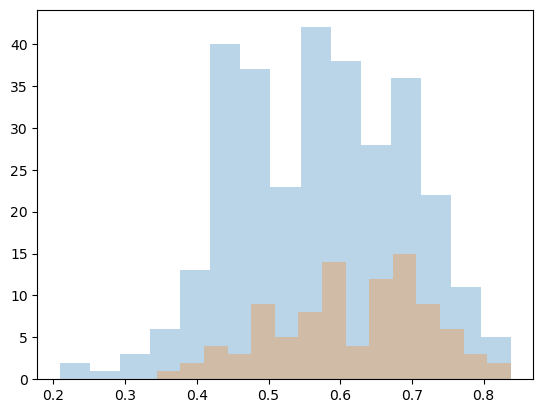

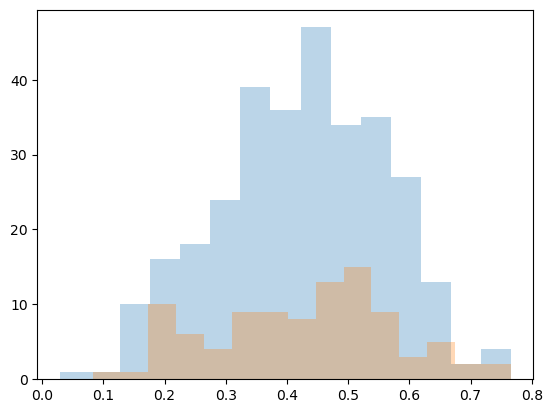

In [11]:
mem_with_na = df['membership']
mem_without_na = not_null_df['membership']
trait_with_na = df['traitsig']
trait_without_na= not_null_df['traitsig']



plt.hist(x=df['membership'], bins=15, alpha= .3)
plt.hist(x=not_null_df['membership'], bins=15, alpha = .3)
plt.show()

plt.hist(x=df['traitsig'], bins=15, alpha= .3)
plt.hist(x=not_null_df['traitsig'], bins=15, alpha = .3)
plt.show()

2.) Using NCBI datasets, create an enzyme classification on available genes. Note, not every gene has an enzyme directly produced.  Second note, genes that were not in this dataset were dropped, and genes without an enzyme produced in the description were dropped.

In [12]:
import re
from collections import defaultdict
from io import BytesIO, StringIO
from pathlib import Path
from zipfile import ZipFile
import matplotlib.pyplot as plt
from Bio import AlignIO, Phylo, SeqIO
from Bio.Align.Applications import MuscleCommandline
from Bio.Phylo.TreeConstruction import (
    NNITreeSearcher,
    ParsimonyScorer,
    ParsimonyTreeConstructor,
)
from Bio.SeqRecord import SeqRecord
from ncbi.datasets import GeneApi

/opt/anaconda3/lib/python3.11/site-packages/Bio/Application/__init__.py:40: BiopythonDeprecationWarning: The Bio.Application modules and modules relying on it have been deprecated.

Due to the on going maintenance burden of keeping command line application
wrappers up to date, we have decided to deprecate and eventually remove these
modules.

We instead now recommend building your command line and invoking it directly
with the subprocess module.
  warnings.warn(


In [13]:
taxon = 'human'
symbols = df['gene'].tolist()
print (type(symbols))

gene_api = GeneApi()

<class 'list'>


In [14]:
metadata = gene_api.gene_metadata_by_tax_and_symbol(symbols, taxon)

In [15]:
gene_des = {}

for gene_data in metadata.genes:
    
    x = gene_data.gene.description
    y = gene_data.gene.symbol
    
    gene_des[y] = x
    
### an attribute error arises but it is fine please proceed    

AttributeError: 'NoneType' object has no attribute 'description'

In [16]:
#print (gene_des)
#print (len(gene_des))

In [17]:
keys = []
values = []

for key,value in gene_des.items():
    keys.append(key)
    values.append(value)
    

data = {'gene': keys,
        'enzyme_des': values}

df_des = pd.DataFrame(data)


print (df_des.head())
df_des.describe()

        gene                                  enzyme_des
0     HOTAIR                HOX transcript antisense RNA
1  LINC00892  long intergenic non-protein coding RNA 892
2  LINC00605  long intergenic non-protein coding RNA 605
3     IPO5P1                     importin 5 pseudogene 1
4   GOLGA8DP       golgin A8 family member D, pseudogene


,gene,enzyme_des
count,264,264
unique,264,264
top,HOTAIR,HOX transcript antisense RNA
freq,1,1


The majority of enzymes are identified with the suffix 'ase', so I used this string to search for candidates.

In [18]:
enz_list = []

for x in df_des['enzyme_des']:
    ase = 'ase'
    li_st = [i for i in x.split() if ase in i ]
    if li_st == []:
        li_st_ = 'other'
    else:
        li_st_ = li_st[0]
    
    enz_list.append(li_st_)
        
print (enz_list)
print(len(enz_list))

['other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'deaminase', 'other', 'other', 'carboxypeptidase', 'other', 'kinase', 'other', 'kinase', 'other', 'metallopeptidase', 'other', 'other', 'other', 'other', 'other', 'kinase', 'anhydrase', 'cyclase', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'kinase', 'other', 'other', 'other', 'other', 'other', 'kinase', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'dehydrogenase', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'kinase', 'other', 'GTPase', 'other', 'alpha-L-fucosidase', 'kinase', 'other', 'beta-secretase', 'other', 'other', 'other', 'other', 'o

In [19]:
data_2 = {'gene': keys,
        'assoc_enzymes': enz_list}

df_enz = pd.DataFrame(data_2)


print (df_enz.head())
df_enz.describe()

        gene assoc_enzymes
0     HOTAIR         other
1  LINC00892         other
2  LINC00605         other
3     IPO5P1         other
4   GOLGA8DP         other


,gene,assoc_enzymes
count,264,264
unique,264,35
top,HOTAIR,other
freq,1,212


In [20]:
df_enz_without_other = df_enz[df_enz['assoc_enzymes'] != 'other']

df_enz_without_other.describe()

,gene,assoc_enzymes
count,52,52
unique,52,34
top,ADAR,kinase
freq,1,9


In [21]:
df_2 = df.merge(df_enz, how='inner', on='gene')

df_2.head()

,membership,traitsig,ensg_version,gene,LV_number,LV_pathway,assoc_enzymes
0,0.5158,0.2172,ENSG00000137959.15,IFI44L,2,MetaMEx_AerobicTraining,other
1,0.5497,0.4713,ENSG00000160710.16,ADAR,2,MetaMEx_AerobicTraining,deaminase
2,0.7754,0.5447,ENSG00000082512.14,TRAF5,2,MetaMEx_AerobicTraining,other
3,0.7309,0.4325,ENSG00000163219.11,ARHGAP25,2,MetaMEx_AerobicTraining,GTPase
4,0.5587,0.4396,ENSG00000153208.16,MERTK,2,MetaMEx_AerobicTraining,kinase


In [22]:
df_2.describe()

,membership,traitsig
count,252.000000,252.000000
mean,0.584875,0.433260
std,0.114327,0.137893
min,0.236800,0.029100
25%,0.493000,0.345375
50%,0.589450,0.448900
75%,0.678075,0.532750
max,0.838100,0.765800


There were two genes, containing enzymes function, that were lost in the join, so I had to see where the NCBI dataset changed the gene name, and then manually insert the enzymes into those genes who had their name changed.

In [23]:
df_2_without_other = df_2[df_2['assoc_enzymes'] != 'other']

df_2_without_other.describe()

,membership,traitsig
count,50.000000,50.000000
mean,0.586992,0.406314
std,0.110572,0.143765
min,0.303700,0.082200
25%,0.497425,0.313175
50%,0.602200,0.396450
75%,0.677300,0.513150
max,0.760100,0.639500


In [24]:
s1 = df['gene']
s2 = df_enz['gene']
df_compare = pd.concat([s1,s2])

print(df_compare)

2        IFI44L
3          ADAR
4         TRAF5
5      ARHGAP25
6         MERTK
         ...   
259      RASSF2
260      TRANK1
261    RABGAP1L
262    ARHGAP25
263       PTBP3
Name: gene, Length: 571, dtype: object


In [25]:
print(len(df_compare[df_compare.duplicated() == True]))

252


In [26]:
duplicated = df_compare[df_compare.duplicated() == True].tolist()
duplicated_set = set(duplicated)

ncbi_gene_list = df_enz['gene'].tolist()
ncbi_gene_set = set(ncbi_gene_list)

diff = ncbi_gene_set - duplicated_set

print (diff)

{'ACP3', 'TLCD5', 'DYNLT4', 'TASL', 'IFTAP', 'H2BC26', 'FCGR1BP', 'CFAP91', 'DIPK1C', 'SLC66A3', 'SEPTIN6', 'PABIR2'}


In [27]:
orig_gene_list = df['gene'].tolist()
orig_gene_set = set(orig_gene_list)

ncbi_diff = orig_gene_set - ncbi_gene_set

print (ncbi_diff)

{'AC106795.5', 'FAM122B', 'AL365209.1', 'AC244502.1', 'AP001646.2', 'AF117829.1', 'AC011511.4', 'AC011477.1', 'AC004847.1', 'TMEM136', 'AF127936.2', 'AL021328.1', 'AC114271.1', 'AC131097.4', 'AC091488.1', 'CXorf21', 'AP000525.1', 'AC131902.2', 'SEPT6', 'AC125611.3', 'AL353746.1', 'TCTEX1D4', 'FAM69C', 'AC069209.1', 'AC104772.1', 'AC019257.7', 'AC104663.1', 'HIST3H2BB', 'AC098820.2', 'AC113382.2', 'AD000864.1', 'AC245100.4', 'PQLC3', 'AL359762.1', 'AL109811.2', 'AL034397.3', 'AL731533.2', 'AL161785.1', 'AC027702.1', 'MAATS1', 'AL133355.1', 'FP565260.3', 'AL031595.1', 'AC012485.3', 'AL606760.1', 'AC008581.1', 'C11orf74', 'AC105749.1', 'AC020915.3', 'AL445472.1', 'AC012313.2', 'AC099548.2', 'AC098484.3', 'ACPP', 'FCGR1B'}


In [28]:
diff_as_a_list = list(diff)

df_enz_without_other_and_set = df_enz[df_enz['gene'].isin(diff_as_a_list)]

print (df_enz_without_other_and_set)

        gene assoc_enzymes
46     IFTAP         other
50    DIPK1C        kinase
52    H2BC26         other
55   SLC66A3         other
67    PABIR2         other
82     TLCD5         other
85   FCGR1BP         other
88   SEPTIN6         other
125   DYNLT4         other
176     ACP3   phosphatase
222     TASL         other
242   CFAP91         other


In [29]:
row_number_FAM69C = df[df['gene'] == 'FAM69C'].index

print(row_number_FAM69C)

print (df.iloc[253])

row_number_ACPP = df[df['gene'] == 'ACPP'].index

print(row_number_ACPP)

print (df.iloc[141])

FAM69C_row = {'membership': 0.4532, 'traitsig': 0.3218, 'ensg_version': 'ENSG00000187773.8', 'gene': 'FAM69C', 'LV_number': None, 'LV_pathway':None , 'assoc_enzymes':'kinase'}

df_2.loc[len(df_2)] = FAM69C_row

ACPP_row = {'membership': 0.6015, 'traitsig': 0.4211, 'ensg_version': 'ENSG00000014257.15', 'gene': 'ACPP', 'LV_number':None , 'LV_pathway':None , 'assoc_enzymes':'phosphatase'}

df_2.loc[len(df_2)] = ACPP_row

Index([255], dtype='int64')
1
membership                 0.4532
traitsig                   0.3218
ensg_version    ENSG00000187773.8
gene                       FAM69C
LV_number                     NaN
LV_pathway                    NaN
Name: 255, dtype: object
Index([143], dtype='int64')
1
membership                  0.6015
traitsig                    0.4211
ensg_version    ENSG00000014257.15
gene                          ACPP
LV_number                      NaN
LV_pathway                     NaN
Name: 143, dtype: object


/var/folders/w4/swg_x0mn7sl_p9j90gy4tmk80000gn/T/ipykernel_24469/3250359206.py:15: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_2.loc[len(df_2)] = FAM69C_row
/var/folders/w4/swg_x0mn7sl_p9j90gy4tmk80000gn/T/ipykernel_24469/3250359206.py:19: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_2.loc[len(df_2)] = ACPP_row


In [30]:
df_2_without_other = df_2[df_2['assoc_enzymes'] != 'other']

df_2_without_other.describe()

,membership,traitsig
count,52.000000,52.000000
mean,0.584698,0.404973
std,0.109984,0.141422
min,0.303700,0.082200
25%,0.495275,0.316325
50%,0.601500,0.396450
75%,0.675900,0.512850
max,0.760100,0.639500


In [31]:
print(df_2.tail())

     membership  traitsig        ensg_version    gene LV_number LV_pathway  \
249      0.4009    0.4590   ENSG00000183837.9   PNMA3       NaN        NaN   
250      0.6261    0.6430  ENSG00000160219.11    GAB3       NaN        NaN   
251      0.5075    0.5812   ENSG00000155961.4  RAB39B       NaN        NaN   
252      0.4532    0.3218   ENSG00000187773.8  FAM69C       NaN       None   
253      0.6015    0.4211  ENSG00000014257.15    ACPP       NaN       None   

    assoc_enzymes  
249         other  
250         other  
251         other  
252        kinase  
253   phosphatase  


In [32]:
df_2['membership'].dtype
df_2['traitsig'].dtype

dtype('float64')

In [33]:
print(df_2['assoc_enzymes'].unique())
print (len(df_2['assoc_enzymes'].unique()))

['other' 'deaminase' 'GTPase' 'kinase'
 '6-beta-N-acetylglucosaminyltransferase' 'scramblase' 'ATPase' 'oxidase'
 'GTPase,' 'metallopeptidase' 'caspase' 'synthetase' 'phosphatase'
 'beta-secretase' 'dehydrogenase' 'glutaminase' 'cyclase' 'endonuclease'
 'desaturase' 'peroxidase' 'glucosyltransferase' '4-hydroxylase'
 'isopentenyltransferase' 'reductase' 'dihydropyrimidinase' 'peptidase'
 'helicase' 'lyase' 'alpha-L-fucosidase' 'carboxypeptidase'
 'sulfotransferase' 'synthase' 'dehydrogenase/reductase'
 'phosphodiesterase' 'anhydrase']
35


Now I classified the enzymes 

In [34]:
oxidoreductase = ['oxidase', 'dehydrogenase', 'desaturase', 'peroxidase', '4-hydroxylase', 'reductase', 'dehydrogenase/reductase']
transferase = ['kinase','6-beta-N-acetylglucosaminyltransferase','glucosyltransferase', 'isopentenyltransferase', 'sulfotransferase']
hydrolase = ['deaminase', 'GTPase', 'GTPase,', 'ATPase', 'metallopeptidase', 'caspase', 'phosphatase', 'beta-secretase', 'glutaminase', 'endonuclease', 'dihydropyrimidinase', 'peptidase', 'helicase', 'alpha-L-fucosidase', 'carboxypeptidase', 'phosphodiesterase']
lyase = ['cyclase', 'lyase', 'anhydrase']
isomerase = []
ligase = ['synthetase', 'synthase']
translocase = ['scramblase']

ec = [oxidoreductase, transferase, hydrolase, lyase, isomerase, ligase, translocase]

enzyme_class = []

for x in range(len(df_2['assoc_enzymes'])):
    if df_2['assoc_enzymes'][x] in ec[0]:
        enzyme_class.append(1)
    elif df_2['assoc_enzymes'][x] in ec[1]:
        enzyme_class.append(2)
    elif df_2['assoc_enzymes'][x] in ec[2]:
        enzyme_class.append(3)
    elif df_2['assoc_enzymes'][x] in ec[3]:
        enzyme_class.append(4)
    elif df_2['assoc_enzymes'][x] in ec[5]:
        enzyme_class.append(6)
    elif df_2['assoc_enzymes'][x] in ec[6]:
        enzyme_class.append(7)
    else:
        enzyme_class.append(0)

In [35]:
df_2['enzyme_class'] = enzyme_class

print (df_2.head())

   membership  traitsig        ensg_version      gene LV_number  \
0      0.5158    0.2172  ENSG00000137959.15    IFI44L         2   
1      0.5497    0.4713  ENSG00000160710.16      ADAR         2   
2      0.7754    0.5447  ENSG00000082512.14     TRAF5         2   
3      0.7309    0.4325  ENSG00000163219.11  ARHGAP25         2   
4      0.5587    0.4396  ENSG00000153208.16     MERTK         2   

                LV_pathway assoc_enzymes  enzyme_class  
0  MetaMEx_AerobicTraining         other             0  
1  MetaMEx_AerobicTraining     deaminase             3  
2  MetaMEx_AerobicTraining         other             0  
3  MetaMEx_AerobicTraining        GTPase             3  
4  MetaMEx_AerobicTraining        kinase             2  


In [36]:
df_2.groupby(['enzyme_class'])['membership'].count()

enzyme_class
0    202
1      8
2     13
3     23
4      3
6      4
7      1
Name: membership, dtype: int64

3.) The third step is the enzyme classification association of each vitamin and mineral based on their web scrapes from wikipedia and journals.  The logic is this: find a summary of each vitamin/nutrient, iterate over the text in search of the enzyme suffix, 'ase', sort out words that are clearly not enzymes, use enzyme classification catalogue to find how many times a certain enzyme classification is mentioned in the description, and then create a dictionary of percentages of associations.  From there the associations factors will be added to the dataframe.

In [37]:
nutrients= ['Vitamin A','Vitamin C', 'Calcium', 'Iron', 'Vitamin D', 'Vitamin E', 'Vitamin K', 'Thiamin', 'Riboflavin', 'Niacin', 'Vitamin B6', 'Folate', 'Vitamin B12', 'Biotin', 'Pantothenic Acid', 'Phosphorous', 'Iodine', 'Magnesium', 'Zinc', 'Selenium', 'Copper', 'Manganese', 'Chromium', 'Molybdenum', 'Chloride', 'Potassium', 'Choline']

In [38]:
import wikipedia

Below is the finalized set of words to set of enzyme classification identifications from all of the scrapes (had to personally compile this list through 27 searches)

In [39]:
oxidoreductase = ['oxidase', 'dehydrogenase', 'desaturase', 'peroxidase', '4-hydroxylase', 'reductase', 'dehydrogenase/reductase','dehydrogenases','reductasesretinal','dehydrogenaseretinal','1515dioxygenase','1515monooxygenase','15monooxygenase','prolyl3hydroxylases','prolyl4hydroxylases','hydroxylases','hydroxylase','dioxygenase', 'betahydroxylase', 'monooxygenase', 'oxidases','6dehydrogenase','25hydroxylase', '1alphahydroxylase', '24hydroxylase', '27hydroxylase','hydrogenases','nitrogenase','lipoxygenases','catalase','deiodinases','deiodinase','peroxidases','Deiodinases','iodinase','dehydrogenasebranched', 'dehydrogenase2','laccases','tyrosinases','reductaseChemical','oxidoreductases','phenoloxidase', 'nitrogenases','Nitrogenases','oxidoreductase']
transferase = ['kinase','6-beta-N-acetylglucosaminyltransferase','glucosyltransferase', 'isopentenyltransferase', 'sulfotransferase','acyltransferase','transferase','pyrophosphorylase','glucuronokinase','carboxylase','transaminase','Transaminases','phosphorylase','transaminases','aminotransferase','vitaminMethyltransferasesMethyl','methyltransferase','diphosphokinase','transketolase','kinaseThe','thiaminases', 'thiaminase','kinase;','polymerase','polymerases','hydroxymethyltransferase','carboxylases','transferaseFinally','transferases','kinases','cytidylyltransferases','acetyltransferase','Kinases','carboxykinase','[53]Phosphofructokinase']
hydrolase = ['deaminase', 'GTPase', 'GTPase,', 'ATPase', 'ATPases' 'metallopeptidase', 'caspase', 'phosphatase', 'beta-secretase', 'glutaminase', 'endonuclease', 'dihydropyrimidinase', 'peptidase', 'helicase', 'alpha-L-fucosidase', 'carboxypeptidase', 'phosphodiesterase','hydrolases','hydrolase','gluconolactonase—between','phosphatases','vitaminDehalogenasesSome', 'dehalogenases','proteases','glucosidase','pyrophosphatase','conjugase','biotinidase','Biotinidase','sulfoxideBiotinidase','Pantetheinase','fermentationCarboxypeptidase','arginase','transcriptases','amylase','cholinephosphotransferase','phospholipases','acetylcholinesterase','Phosphatases','Enolase','helicases','exonucleases']
lyase = ['cyclase', 'lyase', 'anhydrase','cystathionase','lyasetransketolasePresent','decarboxylase','hydratase','decarboxylase4′','lyases','Aldolase']
isomerase = ['racemase','animalsIsomerasesRearrangements','isomerase','isomerases','mutase','dismutase','dismutases','topoisomerases']
ligase = ['synthetase', 'synthase','cosynthetase','synthaseThe','synthase;','ligase','synthetaseValproic','holocarboxylase','synthetaseBiotinylation','Holocarboxylase','ligases']
translocase = ['scramblase']

ec = [oxidoreductase, transferase, hydrolase, lyase, isomerase, ligase, translocase]

Below is the function used to scrape the wikis for enzymes

In [40]:
def nutrient_text_enzymes(nutrient):
    
    wiki = wikipedia.page(nutrient)

    text = wiki.content

    text = text.replace('==', '')

    text = text.replace('\n', '')[:-12]
    
    #print (text)
    
    text = text.replace(".", "")
    text = text.replace(':','')
    text = text.replace(',','')
    text = text.replace('-',' ')
    text = text.replace("'",'')
    text = text.replace('(','')
    text = text.replace(')','')
    text = text.replace('=','')
    text = text.replace('"','')


    text = str(text)
    text = text.split()
    enzymes = []
    
    not_useful_ase = ['case', 'cases', 'increase', 'increases', 'increased', 'increasing','decrease', 'decreases', 'decreased','decreasing','release','releases','released','releasing','cease','ceases','ceased','ceasing','base','bases','based','disease','diseases','database','Cases','cerealbased','baseline','proteinbased','plantbased','increasesThe','grease','greases','greased','D3based', 'Disease', 'Diseases', 'Diseased', 'Increase','Increases','Increased','Decrease','Decreased','Decreases','Database','please','pleases','pleased''Please','Pleases','Pleased','diseases.','disease:','disease.','Disease:','Disease.']
    
    for x in text:
        ase = 'ase'
        if x not in not_useful_ase and ase in x:
            enzymes.append(x)
            
    return enzymes

Below is the enzyme classification function used in the scraping of sites

In [41]:
def enzyme_classify(enzyme_list):
    
    vit_distribution= []

    for x in range(len(enzyme_list)):
        if enzyme_list[x] in ec[0]:
            vit_distribution.append(1)
        elif enzyme_list[x] in ec[1]:
            vit_distribution.append(2)
        elif enzyme_list[x] in ec[2]:
            vit_distribution.append(3)
        elif enzyme_list[x] in ec[3]:
            vit_distribution.append(4)
        elif enzyme_list[x] in ec[4]:
            vit_distribution.append(5)
        elif enzyme_list[x] in ec[5]:
            vit_distribution.append(6)
        elif enzyme_list[x] in ec[6]:
            vit_distribution.append(7)
        else:
            vit_distribution.append(0)
            
    return vit_distribution
    

Below is the function used to make the classification percentages:

In [42]:
def vit_rat_dict(vit_list):
    
    history= []
    
    dict_rat ={}
    
    for x in range(len(vit_list)):
        if vit_list[x] not in history and vit_list[x] != 0:
            y = (vit_list.count(vit_list[x]))/len([i for i in vit_list if i !=0])
            z = vit_list[x]
            dict_rat[z]= y
            history.append(list[x])
        elif list[x] in history:
            print('no')
            
    return dict_rat

Below is the function combining the: 1.)wiki search and scrape, 2.)enzyme classification, and ratio 3.)production all into one

In [43]:
def nutrient_overall(nutrient):
    nutr_enzymes = nutrient_text_enzymes(nutrient)

    #print (nutr_enzymes)
    #print (len(nutr_enzymes))
    
    nutr_distribution = enzyme_classify(nutr_enzymes)

    #print (nutr_distribution)

    ratio_nutr = vit_rat_dict(nutr_distribution)

    #print (ratio_nutr)

Below is the function used to make scrapes on journal entries using Beatiful Soup

In [44]:
import requests

from bs4 import BeautifulSoup
import pandas as pd
import time

This is the function to scrape the url:

In [45]:
def ncbi_enzyme_search(url):


    response = requests.get(url)

    soup = BeautifulSoup(response.content, 'html.parser')
    text = soup.get_text()
    
    
    text = text.replace(".", "")
    text = text.replace(':','')
    text = text.replace(',','')
    text = text.replace('-',' ')
    text = text.replace("'",'')
    text = text.replace('(','')
    text = text.replace(')','')
    text = text.replace('=','')
    text = text.replace('"','')
    
    text = text.split()
    enzymes = []
    
    not_useful_ase = ['case', 'cases', 'increase', 'increases', 'increased', 'increasing','decrease', 'decreases', 'decreased','decreasing','release','releases','released','releasing','cease','ceases','ceased','ceasing','base','bases','based','disease','diseases','database','Cases','cerealbased','baseline','proteinbased','plantbased','increasesThe','grease','greases','greased','D3based', 'Disease', 'Diseases', 'Diseased', 'Increase','Increases','Increased','Decrease','Decreased','Decreases','Database','please','pleases','pleased''Please','Pleases','Pleased','diseases.','disease:','disease.','Disease:','Disease.']

    for x in text:
        ase = 'ase'
        if x not in not_useful_ase and ase in x:
            enzymes.append(x)
            
    return enzymes

This is the function to produce the dictionary of association percentages (utilizing the functions used in the wiki scrapes):

In [46]:
def nutrient_overall_url(url):
    nutr_enzymes = ncbi_enzyme_search(url)

    #print (nutr_enzymes)
    #print (len(nutr_enzymes))
    
    nutr_distribution = enzyme_classify(nutr_enzymes)

    #print (nutr_distribution)

    ratio_nutr = vit_rat_dict(nutr_distribution)

    #print (ratio_nutr)

In [47]:
def nutrient_dataframe(nutrient_list):
    df_list = []
    
    for x in nutrient_list:
    
        nutr_enzymes = nutrient_text_enzymes(x)
    
        nutr_distribution = enzyme_classify(nutr_enzymes)

        ratio_nutr = vit_rat_dict(nutr_distribution)
    
        df_list.append(ratio_nutr)
    
    df_nutr = pd.DataFrame(data=df_list)
    
    return df_nutr


In [48]:
nutrient_list_wiki = ['Vitamin A','Vitamin.C','Iron.','Vitamin.D','Vitamin.E','Vitamin.K','Thiamin.','Riboflavin.','Niacin.','Vitamin.B6','Folate.','Vitamin.B12','Biotin.','Pantothenic Acid.','Iodine.','Zinc.','Selenium','coopper','Manganese','Molybdenum','Chloride','Potassium','Choline.']

df_nutr = nutrient_dataframe(nutrient_list_wiki)

In [49]:
df_nutr_T =df_nutr.T
df_nutr_T.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
1,0.85,0.78125,1.0,0.857143,0.5,0.166667,0.260870,0.470588,0.142857,0.217391,...,NaN,1.0,0.222222,0.909091,0.777778,0.230769,1.0,NaN,NaN,0.133333
3,0.10,0.06250,NaN,NaN,NaN,NaN,0.043478,0.117647,NaN,0.086957,...,0.142857,NaN,0.333333,0.045455,NaN,0.230769,NaN,1.0,1.0,0.333333
2,0.05,0.09375,NaN,NaN,0.5,0.833333,0.478261,0.117647,0.714286,0.391304,...,0.571429,NaN,NaN,NaN,NaN,0.076923,NaN,NaN,NaN,0.466667
6,NaN,0.06250,NaN,0.142857,NaN,NaN,0.130435,0.294118,NaN,0.130435,...,0.142857,NaN,NaN,NaN,NaN,0.230769,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,0.086957,NaN,0.142857,0.130435,...,0.142857,NaN,0.444444,NaN,NaN,0.076923,NaN,NaN,NaN,0.066667


In [50]:
df_nutr_T.sort_index(axis=0, ascending=True, inplace=True)


In [51]:
nutrients= ['Vitamin A Factor','Vitamin C Factor', 'Iron Factor', 'Vitamin D Factor', 'Vitamin E Factor', 'Vitamin K Factor', 'Thiamin Factor', 'Riboflavin Factor', 'Niacin Factor', 'Vitamin B6 Factor', 'Folate Factor', 'Vitamin B12 Factor', 'Biotin Factor', 'Pantothenic Acid Factor', 'Iodine Factor', 'Zinc Factor', 'Selenium Factor', 'Copper Factor', 'Manganese Factor', 'Molybdenum Factor', 'Chloride Factor', 'Potassium Factor', 'Choline Factor']

df_nutr_T.columns = nutrients

In [52]:
df_nutr_T['enzyme_class']= {1:1, 2:2, 3:3, 4:4, 5:5, 6:6, 7:7}
df_nutr_T.head()

,Vitamin A Factor,Vitamin C Factor,Iron Factor,Vitamin D Factor,Vitamin E Factor,Vitamin K Factor,Thiamin Factor,Riboflavin Factor,Niacin Factor,Vitamin B6 Factor,...,Iodine Factor,Zinc Factor,Selenium Factor,Copper Factor,Manganese Factor,Molybdenum Factor,Chloride Factor,Potassium Factor,Choline Factor,enzyme_class
1,0.85,0.78125,1.0,0.857143,0.5,0.166667,0.260870,0.470588,0.142857,0.217391,...,1.0,0.222222,0.909091,0.777778,0.230769,1.0,NaN,NaN,0.133333,1
2,0.05,0.09375,NaN,NaN,0.5,0.833333,0.478261,0.117647,0.714286,0.391304,...,NaN,NaN,NaN,NaN,0.076923,NaN,NaN,NaN,0.466667,2
3,0.10,0.06250,NaN,NaN,NaN,NaN,0.043478,0.117647,NaN,0.086957,...,NaN,0.333333,0.045455,NaN,0.230769,NaN,1.0,1.0,0.333333,3
4,NaN,NaN,NaN,NaN,NaN,NaN,0.086957,NaN,0.142857,0.130435,...,NaN,0.444444,NaN,NaN,0.076923,NaN,NaN,NaN,0.066667,4
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043478,...,NaN,NaN,0.045455,0.222222,0.153846,NaN,NaN,NaN,NaN,5


Do a second nutrient dataframe addition for the journal entries

In [53]:
def nutrient_dataframe_sec(url_list):
    df_list = []
    
    for x in url_list:
    
        nutr_enzymes = ncbi_enzyme_search(x)
    
        nutr_distribution = enzyme_classify(nutr_enzymes)

        ratio_nutr = vit_rat_dict(nutr_distribution)
    
        df_list.append(ratio_nutr)
    
    df_nutr = pd.DataFrame(data=df_list)
    
    return df_nutr

In [54]:
url_list_nutrients = ['https://www.mdpi.com/2072-6643/13/4/1136', 'https://www.mdpi.com/2072-6643/13/4/1136', 'https://www.mdpi.com/2218-273X/12/12/1891', 'https://www.mdpi.com/1422-0067/20/19/4901']

df_nutr_2 = nutrient_dataframe_sec(url_list_nutrients)

df_nutr_2_T =df_nutr_2.T
df_nutr_2_T.head()

df_nutr_2_T.sort_index(axis=0, ascending=True, inplace=True)

nutrient_sec = ['Magnesium Factor', 'Phosphate Factor', 'Calcium Factor', 'Chromium Factor']
df_nutr_2_T.columns = nutrient_sec


In [55]:
df_nutr_2_T['enzyme_class']= {1:1, 2:2, 3:3, 4:4, 5:5, 6:6, 7:7}
df_nutr_2_T.head()

,Magnesium Factor,Phosphate Factor,Calcium Factor,Chromium Factor,enzyme_class
1,0.228571,0.228571,0.230769,0.076923,1
2,0.400000,0.400000,0.153846,0.538462,2
3,0.300000,0.300000,0.307692,0.384615,3
4,0.014286,0.014286,NaN,NaN,4
5,0.028571,0.028571,NaN,NaN,5


In [56]:
df_nutr_merge = df_nutr_T.merge(df_nutr_2_T, left_on='enzyme_class', right_on='enzyme_class', how='left')

df_nutr_merge.head()

,Vitamin A Factor,Vitamin C Factor,Iron Factor,Vitamin D Factor,Vitamin E Factor,Vitamin K Factor,Thiamin Factor,Riboflavin Factor,Niacin Factor,Vitamin B6 Factor,...,Manganese Factor,Molybdenum Factor,Chloride Factor,Potassium Factor,Choline Factor,enzyme_class,Magnesium Factor,Phosphate Factor,Calcium Factor,Chromium Factor
0,0.85,0.78125,1.0,0.857143,0.5,0.166667,0.260870,0.470588,0.142857,0.217391,...,0.230769,1.0,NaN,NaN,0.133333,1,0.228571,0.228571,0.230769,0.076923
1,0.05,0.09375,NaN,NaN,0.5,0.833333,0.478261,0.117647,0.714286,0.391304,...,0.076923,NaN,NaN,NaN,0.466667,2,0.400000,0.400000,0.153846,0.538462
2,0.10,0.06250,NaN,NaN,NaN,NaN,0.043478,0.117647,NaN,0.086957,...,0.230769,NaN,1.0,1.0,0.333333,3,0.300000,0.300000,0.307692,0.384615
3,NaN,NaN,NaN,NaN,NaN,NaN,0.086957,NaN,0.142857,0.130435,...,0.076923,NaN,NaN,NaN,0.066667,4,0.014286,0.014286,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043478,...,0.153846,NaN,NaN,NaN,NaN,5,0.028571,0.028571,NaN,NaN


Now merge the nutrient dataframes to the original

In [57]:
df_merge = df_2.merge(df_nutr_merge, left_on='enzyme_class', right_on='enzyme_class', how='left')

print (df_merge.head(10))

   membership  traitsig        ensg_version      gene LV_number  \
0      0.5158    0.2172  ENSG00000137959.15    IFI44L         2   
1      0.5497    0.4713  ENSG00000160710.16      ADAR         2   
2      0.7754    0.5447  ENSG00000082512.14     TRAF5         2   
3      0.7309    0.4325  ENSG00000163219.11  ARHGAP25         2   
4      0.5587    0.4396  ENSG00000153208.16     MERTK         2   
5      0.6029    0.5140   ENSG00000152127.8     MGAT5         2   
6      0.4493    0.3355  ENSG00000163359.15    COL6A3         2   
7      0.8284    0.6855  ENSG00000168016.14    TRANK1         2   
8      0.7394    0.5133  ENSG00000188313.12    PLSCR1         2   
9      0.6431    0.7271   ENSG00000114450.9      GNB4         2   

                LV_pathway                           assoc_enzymes  \
0  MetaMEx_AerobicTraining                                   other   
1  MetaMEx_AerobicTraining                               deaminase   
2  MetaMEx_AerobicTraining                          

In [58]:
df_merge = df_merge.drop(columns=['LV_number','LV_pathway'])

In [59]:
df_merge = df_merge.fillna(0)

Make the multiplication columns

In [60]:
vit_subset = df_merge.iloc[: ,6:]

In [61]:
def assoc_products(subset):
    data_frame = pd.DataFrame()
    for x in range(len(subset.columns)):
        coll = df_merge['membership'] * vit_subset[subset.columns[x]] + df_merge['traitsig'] * vit_subset[subset.columns[x]]
        
        ser = pd.Series(data = coll)
        
        data_frame[subset.columns[x]+' Product and Sum'] = ser
        
    return data_frame

In [62]:
df_sum_prod = assoc_products(vit_subset)
print (df_sum_prod)

     Vitamin A Factor Product and Sum  Vitamin C Factor Product and Sum  \
0                            0.000000                          0.000000   
1                            0.102100                          0.063812   
2                            0.000000                          0.000000   
3                            0.116340                          0.072712   
4                            0.049915                          0.093591   
..                                ...                               ...   
249                          0.000000                          0.000000   
250                          0.000000                          0.000000   
251                          0.000000                          0.000000   
252                          0.038750                          0.072656   
253                          0.102260                          0.063912   

     Iron Factor Product and Sum  Vitamin D Factor Product and Sum  \
0                            

In [63]:
df_merge_final = df_merge.merge(df_sum_prod, left_index=True, right_index=True)

print (len(df_merge_final))

254


In [64]:
df_merge_final.to_csv('wrangled_data.csv')